In [2]:
import numpy as np
import pandas as pd

In [227]:
%%time
df_iforest_f1 = pd.read_csv("outputs/ifoest_f1_anomalies.csv")
df_iforest_f2 = pd.read_csv("outputs/ifoest_f2_anomalies.csv")
df_iforest_f3 = pd.read_csv("outputs/ifoest_f3_anomalies.csv")
df_ocsvm_f1 = pd.read_csv("outputs/ocsvm_f1_anomalies.csv")
df_ocsvm_f2 = pd.read_csv("outputs/ocsvm_f2_anomalies.csv")
df_ocsvm_f3 = pd.read_csv("outputs/ocsvm_f3_anomalies.csv")

<string>:2: DtypeWarning: Columns (5,8) have mixed types.Specify dtype option on import or set low_memory=False.
<string>:2: DtypeWarning: Columns (5,6) have mixed types.Specify dtype option on import or set low_memory=False.


Wall time: 35.1 s


In [232]:
df_list = [df_iforest_f1, df_iforest_f2, df_iforest_f3, df_ocsvm_f1, df_ocsvm_f2, df_ocsvm_f3 ]

for df in df_list:
    df = df.rename(columns={ df.columns[0]: "stream_id" }, inplace = True)
    
sort_by = ['src_ip', 'dst_ip', 'src_port', 'dst_port', 'protocol', 'starttime' , 'endtime']
for df in df_list:
    df=df.sort_values(by=sort_by)
    
for df in df_list:
    df['flow_cnt']=df[['src_ip', 'dst_ip']].apply(lambda x: ' ==> '.join(x), axis=1)

In [ ]:
## IFOREST

In [229]:
df_iforest_f1.src_ip.value_counts()[:10]

224.134.91.164     144925
188.132.90.159      39181
215.101.99.150      38893
228.91.109.140      38833
165.78.92.157       38034
165.213.96.153      37949
170.68.93.156       25317
216.116.104.145     24731
157.51.106.143      24640
239.66.103.146      21532
Name: src_ip, dtype: int64

In [230]:
df_iforest_f1.dst_ip.value_counts()[:10]

125.189.87.2      89279
160.108.108.57    67387
202.18.114.51     61125
205.224.112.53    48665
175.225.124.41    46813
169.17.118.47     45730
141.111.103.62    36771
195.231.110.55    32721
204.213.241.7     31593
145.116.120.45    25439
Name: dst_ip, dtype: int64

In [234]:
df_iforest_f1.flow_cnt.value_counts()[:10]

224.134.91.164 ==> 125.189.87.2       65722
224.134.91.164 ==> 204.213.241.7      31593
215.101.99.150 ==> 162.52.232.25      20962
228.91.109.140 ==> 135.31.242.15      20944
153.193.91.29 ==> 125.189.87.2        15615
192.31.93.182 ==> 141.111.103.62      14405
144.181.96.193 ==> 160.108.108.57     11834
240.143.98.191 ==> 195.231.110.55     11831
145.178.112.177 ==> 175.225.124.41    11829
150.83.100.189 ==> 205.224.112.53     11824
Name: flow_cnt, dtype: int64

In [235]:
df_iforest_f2.src_ip.value_counts()[:10]

224.134.91.164     151165
215.101.99.150      39186
228.91.109.140      38801
165.78.92.157       37249
165.213.96.153      37116
188.132.90.159      34406
216.116.104.145     25514
157.51.106.143      25447
239.66.103.146      20452
153.193.91.29       16355
Name: src_ip, dtype: int64

In [236]:
df_iforest_f2.src_ip.value_counts()[:10]

224.134.91.164     151165
215.101.99.150      39186
228.91.109.140      38801
165.78.92.157       37249
165.213.96.153      37116
188.132.90.159      34406
216.116.104.145     25514
157.51.106.143      25447
239.66.103.146      20452
153.193.91.29       16355
Name: src_ip, dtype: int64

In [237]:
df_iforest_f2.flow_cnt.value_counts()[:10]

224.134.91.164 ==> 125.189.87.2       68866
224.134.91.164 ==> 204.213.241.7      33290
215.101.99.150 ==> 162.52.232.25      21407
228.91.109.140 ==> 135.31.242.15      21407
153.193.91.29 ==> 125.189.87.2        15887
192.31.93.182 ==> 141.111.103.62      14424
240.143.98.191 ==> 195.231.110.55     11849
144.181.96.193 ==> 160.108.108.57     11849
127.90.108.181 ==> 145.116.120.45     11849
145.178.112.177 ==> 175.225.124.41    11848
Name: flow_cnt, dtype: int64

In [238]:
df_iforest_f3.src_ip.value_counts()[:10]

224.134.91.164     107494
228.91.109.140      32834
215.101.99.150      32594
170.68.93.156       26053
216.116.104.145     25495
157.51.106.143      25428
188.142.93.156      19358
194.137.95.154      19346
134.190.103.146     17893
239.66.103.146      15977
Name: src_ip, dtype: int64

In [239]:
df_iforest_f3.src_ip.value_counts()[:10]

224.134.91.164     107494
228.91.109.140      32834
215.101.99.150      32594
170.68.93.156       26053
216.116.104.145     25495
157.51.106.143      25428
188.142.93.156      19358
194.137.95.154      19346
134.190.103.146     17893
239.66.103.146      15977
Name: src_ip, dtype: int64

In [240]:
df_iforest_f3.flow_cnt.value_counts()[:10]

224.134.91.164 ==> 204.213.241.7      33289
224.134.91.164 ==> 125.189.87.2       25762
228.91.109.140 ==> 135.31.242.15      19417
215.101.99.150 ==> 162.52.232.25      19132
192.31.93.182 ==> 141.111.103.62      13084
153.193.91.29 ==> 125.189.87.2        12224
240.143.98.191 ==> 195.231.110.55     11758
144.181.96.193 ==> 160.108.108.57     11585
150.83.100.189 ==> 205.224.112.53     11151
145.178.112.177 ==> 175.225.124.41    11151
Name: flow_cnt, dtype: int64

In [ ]:
# OCSVM

In [241]:
df_ocsvm_f1.src_ip.value_counts()[:10]

224.134.91.164     150995
188.132.90.159      40607
165.78.92.157       39470
215.101.99.150      39413
165.213.96.153      39386
228.91.109.140      39367
170.68.93.156       26077
216.116.104.145     25521
157.51.106.143      25455
239.66.103.146      21714
Name: src_ip, dtype: int64

In [315]:
df_ocsvm_f1.dst_ip.value_counts()[:10]

125.189.87.2      92975
160.108.108.57    65059
202.18.114.51     59266
205.224.112.53    47132
175.225.124.41    45296
169.17.118.47     44285
141.111.103.62    35960
204.213.241.7     33290
195.231.110.55    31579
145.116.120.45    24620
Name: dst_ip, dtype: int64

In [224]:
df_ocsvm_f1.flow_count.value_counts()[:10]

224.134.91.164==>204.213.241.7      33289
224.134.91.164==>125.189.87.2       25762
228.91.109.140==>135.31.242.15      19417
215.101.99.150==>162.52.232.25      19132
192.31.93.182==>141.111.103.62      12638
153.193.91.29==>125.189.87.2        12224
144.181.96.193==>160.108.108.57     11444
240.143.98.191==>195.231.110.55     11307
214.182.96.194==>160.108.108.57     10776
145.74.96.192==>160.108.108.57      10735
150.83.100.189==>205.224.112.53     10727
145.178.112.177==>175.225.124.41    10721
238.218.96.196==>160.108.108.57     10713
127.90.108.181==>145.116.120.45     10533
156.72.93.197==>141.111.103.62      10257
239.221.102.188==>202.18.114.51     10248
166.36.100.190==>205.224.112.53     10245
202.194.98.193==>195.231.110.55     10129
157.193.102.186==>202.18.114.51     10118
225.73.112.176==>175.225.124.41     10110
Name: flow_count, dtype: int64

In [243]:
df_ocsvm_f2.src_ip.value_counts()[:10]

224.134.91.164     150842
188.132.90.159      40173
165.78.92.157       39122
165.213.96.153      39045
215.101.99.150      38665
228.91.109.140      38616
170.68.93.156       26070
216.116.104.145     25513
157.51.106.143      25446
239.66.103.146      21025
Name: src_ip, dtype: int64

In [314]:
df_ocsvm_f2.dst_ip.value_counts()[:10]

125.189.87.2      92979
160.108.108.57    34807
204.213.241.7     33290
202.18.114.51     30585
205.224.112.53    24672
175.225.124.41    23771
169.17.118.47     23049
162.52.232.25     21407
135.31.242.15     21407
141.111.103.62    18868
Name: dst_ip, dtype: int64

In [245]:
df_ocsvm_f2.flow_cnt.value_counts()[:10]

224.134.91.164 ==> 125.189.87.2      68863
224.134.91.164 ==> 204.213.241.7     33290
215.101.99.150 ==> 162.52.232.25     21407
228.91.109.140 ==> 135.31.242.15     21407
153.193.91.29 ==> 125.189.87.2       15887
228.91.109.140 ==> 182.141.104.3      7525
215.101.99.150 ==> 217.145.94.97      7524
165.78.92.157 ==> 232.19.91.2         7420
165.213.96.153 ==> 184.141.93.4       7420
188.132.90.159 ==> 148.205.90.101     7388
Name: flow_cnt, dtype: int64

In [246]:
df_ocsvm_f3.src_ip.value_counts()[:10]

224.134.91.164     97090
228.91.109.140     28778
215.101.99.150     28565
170.68.93.156      26036
216.116.104.145    25475
157.51.106.143     25408
188.142.93.156     16908
194.137.95.154     16883
134.190.103.146    15473
192.31.93.182      12857
Name: src_ip, dtype: int64

In [316]:
df_ocsvm_f3.dst_ip.value_counts()[:10]

160.108.108.57    62968
202.18.114.51     56472
205.224.112.53    44256
175.225.124.41    43043
169.17.118.47     42103
141.111.103.62    33349
204.213.241.7     33289
195.231.110.55    31496
145.116.120.45    23528
127.57.106.59     21945
Name: dst_ip, dtype: int64

In [249]:
df_ocsvm_f3.flow_cnt.value_counts()[:10]

224.134.91.164 ==> 204.213.241.7      33289
228.91.109.140 ==> 135.31.242.15      19417
215.101.99.150 ==> 162.52.232.25      19132
224.134.91.164 ==> 125.189.87.2       16907
192.31.93.182 ==> 141.111.103.62      12765
240.143.98.191 ==> 195.231.110.55     11340
144.181.96.193 ==> 160.108.108.57     11166
150.83.100.189 ==> 205.224.112.53     10730
145.178.112.177 ==> 175.225.124.41    10725
127.90.108.181 ==> 145.116.120.45     10718
Name: flow_cnt, dtype: int64

In [ ]:
## OCSVM PIE CHART

<AxesSubplot:ylabel='src_ip'>

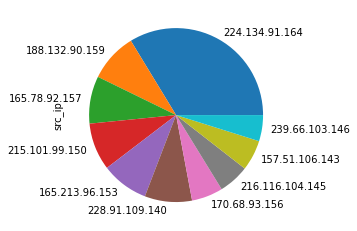

In [250]:
df_ocsvm_f1.src_ip.value_counts()[:10].plot.pie()

<AxesSubplot:ylabel='dst_ip'>

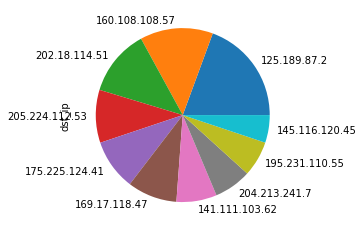

In [251]:
df_ocsvm_f1.dst_ip.value_counts()[:10].plot.pie()

<AxesSubplot:ylabel='src_ip'>

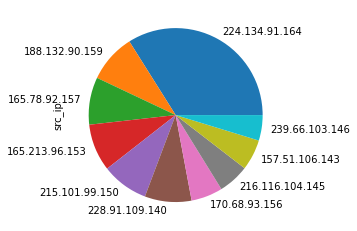

In [252]:
df_ocsvm_f2.src_ip.value_counts()[:10].plot.pie()

<AxesSubplot:ylabel='dst_ip'>

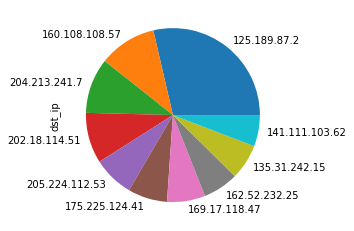

In [253]:
df_ocsvm_f2.dst_ip.value_counts()[:10].plot.pie()

<AxesSubplot:ylabel='src_ip'>

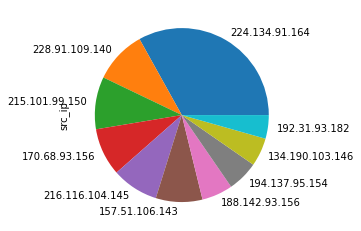

In [254]:
df_ocsvm_f3.src_ip.value_counts()[:10].plot.pie()

<AxesSubplot:ylabel='dst_ip'>

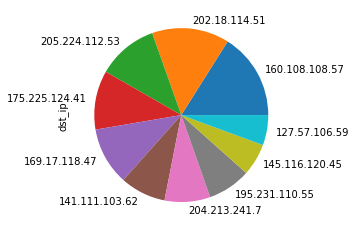

In [255]:
df_ocsvm_f3.dst_ip.value_counts()[:10].plot.pie()

In [256]:
## IFOREST PIE CHART

<AxesSubplot:ylabel='src_ip'>

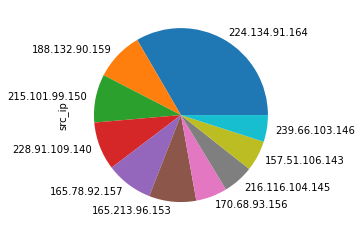

In [257]:
df_iforest_f1.src_ip.value_counts()[:10].plot.pie()

<AxesSubplot:ylabel='dst_ip'>

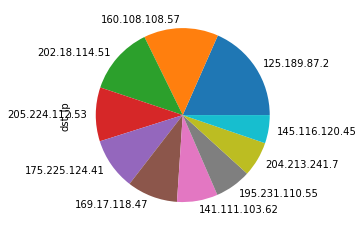

In [258]:
df_iforest_f1.dst_ip.value_counts()[:10].plot.pie()

<AxesSubplot:ylabel='src_ip'>

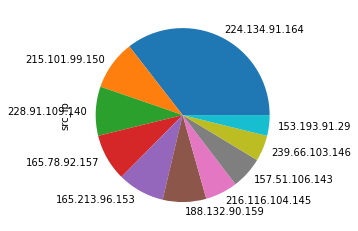

In [259]:
df_iforest_f2.src_ip.value_counts()[:10].plot.pie()

<AxesSubplot:ylabel='dst_ip'>

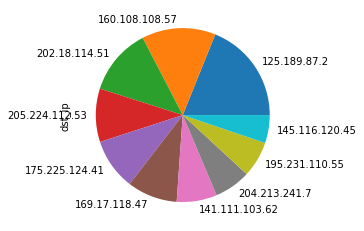

In [282]:
df_iforest_f2.dst_ip.value_counts()[:10].plot.pie()

<AxesSubplot:ylabel='src_ip'>

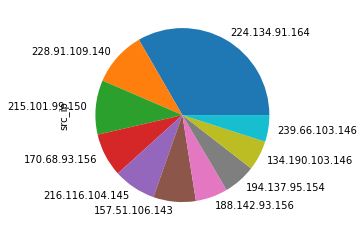

In [261]:
df_iforest_f3.src_ip.value_counts()[:10].plot.pie()

<AxesSubplot:ylabel='dst_ip'>

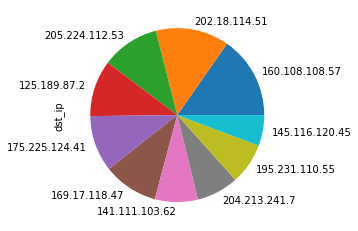

In [262]:
df_iforest_f3.dst_ip.value_counts()[:10].plot.pie()

In [ ]:
## botnet suspicious
#224.134.91.164 ==> 125.189.87.2      68863
#224.134.91.164 ==> 204.213.241.7     33290
#215.101.99.150 ==> 162.52.232.25     21407
#228.91.109.140 ==> 135.31.242.15     21407

In [ ]:
## EXPORT rows containing these top 4 suspicious conversations

In [343]:
for j, df in enumerate(df_list):
    suspicious = df.flow_cnt.value_counts()[:4]
    attack_list= []
    
    for idx, row in df.iterrows():
        if row.flow_cnt in suspicious.index:
            attack_list.append(row)
            
    df_attack = pd.DataFrame(attack_list)    
    df_attack = df_attack[output_columns]
    
    print(len(df_attack))
    df_attack.to_csv('submission_'+ df_name_list[j] + '.csv', index=False)    

139221
144970
97600
144963
144967
88745


In [346]:
%%time
subission_iforest_f1 = pd.read_csv("submission_iforest_f1.csv")
subission_iforest_f2 = pd.read_csv("submission_iforest_f2.csv")
subission_iforest_f3 = pd.read_csv("submission_iforest_f3.csv")
subission_ocsvm_f1 = pd.read_csv("submission_ocsvm_f1.csv")
subission_ocsvm_f2 = pd.read_csv("submission_ocsvm_f2.csv")
subission_ocsvm_f3 = pd.read_csv("submission_ocsvm_f3.csv")

Wall time: 2.62 s


In [347]:
subission_iforest_f1.head()

,stream_id,starttime,endtime,src_ip,dst_ip,src_port,dst_port,protocol
0,7562,2012-12-01 15:44:12.046019000,2012-12-01 15:44:12.046361000,224.134.91.164,125.189.87.2,33643,53,udp
1,7563,2012-12-01 15:44:12.046709000,2012-12-01 15:44:12.047065000,224.134.91.164,125.189.87.2,43214,53,udp
2,7573,2012-12-01 15:44:15.104161000,2012-12-01 15:44:15.104529000,224.134.91.164,125.189.87.2,45697,53,udp
3,7574,2012-12-01 15:44:15.104727000,2012-12-01 15:44:15.104965000,224.134.91.164,125.189.87.2,47220,53,udp
4,7742,2012-12-01 15:46:35.524858000,2012-12-01 15:46:35.572068000,224.134.91.164,125.189.87.2,60463,53,udp


In [348]:
df_list = [subission_iforest_f1, subission_iforest_f2, subission_iforest_f3, subission_ocsvm_f1, subission_ocsvm_f2, subission_ocsvm_f3 ]

for df in df_list:
    df['flow_cnt']=df[['src_ip', 'dst_ip']].apply(lambda x: ' ==> '.join(x), axis=1)

In [359]:
subission_ocsvm_f2.flow_cnt.value_counts()[:10]

224.134.91.164 ==> 125.189.87.2     68863
224.134.91.164 ==> 204.213.241.7    33290
215.101.99.150 ==> 162.52.232.25    21407
228.91.109.140 ==> 135.31.242.15    21407
Name: flow_cnt, dtype: int64

In [ ]:
## START TIME END TIME

In [368]:
subission_ocsvm_f2.groupby(['src_ip', 'dst_ip', 'protocol']).agg(start=('starttime', 'min'), end=('endtime', 'max'))    

start  \
src_ip         dst_ip        protocol                                  
215.101.99.150 162.52.232.25 tcp       2012-12-05 01:24:32.928430000   
224.134.91.164 125.189.87.2  icmp      2012-12-02 15:03:04.407642000   
                             udp       2012-12-01 15:44:12.046019000   
               204.213.241.7 tcp       2012-12-01 15:56:34.815956000   
228.91.109.140 135.31.242.15 tcp       2012-12-09 23:24:33.181435000   

                                                                 end  
src_ip         dst_ip        protocol                                 
215.101.99.150 162.52.232.25 tcp       2012-12-06 01:24:32.221493000  
224.134.91.164 125.189.87.2  icmp      2012-12-08 04:56:28.446218000  
                             udp       2012-12-10 15:09:29.310224000  
               204.213.241.7 tcp       2012-12-08 11:22:03.115622000  
228.91.109.140 135.31.242.15 tcp       2012-12-10 23:24:32.097561000